In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload NHANES Data (Year 1)

In [2]:
demo  = pd.read_sas("Demographics.XPT")
demo.tail()


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
9249,102952.0,10.0,2.0,2.0,70.0,NaN,5.0,6.0,2.0,NaN,...,2.0,1.0,1.0,16896.276203,18338.711104,2.0,138.0,4.0,4.0,0.95
9250,102953.0,10.0,2.0,1.0,42.0,NaN,1.0,1.0,2.0,NaN,...,2.0,2.0,NaN,61630.380013,63661.951573,2.0,137.0,12.0,12.0,NaN
9251,102954.0,10.0,2.0,2.0,41.0,NaN,4.0,4.0,1.0,NaN,...,2.0,2.0,NaN,17160.895269,17694.783346,1.0,144.0,10.0,10.0,1.18
9252,102955.0,10.0,2.0,2.0,14.0,NaN,4.0,4.0,2.0,175.0,...,2.0,1.0,2.0,14238.445922,14871.839636,1.0,136.0,9.0,9.0,2.24
9253,102956.0,10.0,2.0,1.0,38.0,NaN,3.0,3.0,2.0,NaN,...,2.0,2.0,NaN,38645.740291,39426.299948,1.0,142.0,7.0,7.0,1.56


In [3]:
df_demo = demo[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1']]
df_demo.tail()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1
9249,102952.0,2.0,70.0,5.0
9250,102953.0,1.0,42.0,1.0
9251,102954.0,2.0,41.0,4.0
9252,102955.0,2.0,14.0,4.0
9253,102956.0,1.0,38.0,3.0


In [4]:
BP = pd.read_sas('Blood_Pressure.XPT')
df_bp = BP[['SEQN', 'BPXSY1','BPXSY2','BPXSY3']]

In [5]:
BM = pd.read_sas('Body_Measures.XPT')
df_bm = BM[['SEQN', 'BMXBMI']]

In [7]:
diabetes = pd.read_sas('Diabetes.XPT')
df_dia = diabetes[['SEQN','DIQ010']]

In [8]:
kidney = pd.read_sas('Kidney.XPT')
df_kidney = kidney[['SEQN','KIQ022']]

In [9]:
smoking = pd.read_sas('Smoking.XPT')
df_smoking = smoking[['SEQN','SMQ020']]

In [10]:
print(df_demo.shape)
print(df_bp.shape)
print(df_bm.shape)
print(df_dia.shape)
print(df_smoking.shape)
print(df_kidney.shape)

(9254, 4)
(8704, 4)
(8704, 2)
(8897, 2)
(6724, 2)
(5569, 2)


In [11]:
df_outer = [df_demo,df_bp,df_bm,df_dia,df_smoking,df_kidney]


In [12]:
from functools import reduce
df_inner = reduce(lambda  left,right: pd.merge(left,right,on=['SEQN'], how='inner'), df_outer)
df_inner.shape

(5265, 11)

In [13]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5265 entries, 0 to 5264
Data columns (total 11 columns):
SEQN        5265 non-null float64
RIAGENDR    5265 non-null float64
RIDAGEYR    5265 non-null float64
RIDRETH1    5265 non-null float64
BPXSY1      4659 non-null float64
BPXSY2      4886 non-null float64
BPXSY3      4873 non-null float64
BMXBMI      5175 non-null float64
DIQ010      5265 non-null float64
SMQ020      5265 non-null float64
KIQ022      5265 non-null float64
dtypes: float64(11)
memory usage: 493.6 KB


In [14]:
df_inner.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY1,BPXSY2,BPXSY3,BMXBMI,DIQ010,SMQ020,KIQ022
0,93705.0,2.0,66.0,4.0,NaN,NaN,202.0,31.7,2.0,1.0,2.0
1,93708.0,2.0,66.0,5.0,NaN,138.0,144.0,23.7,3.0,2.0,2.0
2,93709.0,2.0,75.0,4.0,120.0,118.0,118.0,38.9,2.0,1.0,2.0
3,93711.0,1.0,56.0,5.0,108.0,94.0,102.0,21.3,2.0,2.0,2.0
4,93713.0,1.0,67.0,3.0,104.0,104.0,106.0,23.5,2.0,1.0,2.0


In [15]:
type(df_inner)

pandas.core.frame.DataFrame

In [16]:
df_inner.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY1,BPXSY2,BPXSY3,BMXBMI,DIQ010,SMQ020,KIQ022
count,5265.000000,5265.000000,5265.000000,5265.000000,4659.000000,4886.000000,4873.000000,5175.000000,5265.000000,5265.000000,5265.000000
mean,98287.699335,1.517379,51.410826,3.265147,126.770122,127.008187,126.557767,29.851787,1.877493,1.580437,1.970370
std,2688.406411,0.499745,17.692044,1.252191,19.780053,20.338012,20.142065,7.396302,0.460438,0.493534,0.337437
min,93705.000000,1.000000,20.000000,1.000000,72.000000,72.000000,72.000000,14.200000,1.000000,1.000000,1.000000
25%,95968.000000,1.000000,36.000000,3.000000,112.000000,112.000000,112.000000,24.800000,2.000000,1.000000,2.000000
50%,98274.000000,2.000000,53.000000,3.000000,124.000000,124.000000,124.000000,28.600000,2.000000,2.000000,2.000000
75%,100621.000000,2.000000,65.000000,4.000000,138.000000,138.000000,136.000000,33.600000,2.000000,2.000000,2.000000
max,102956.000000,2.000000,80.000000,5.000000,228.000000,236.000000,238.000000,86.200000,9.000000,2.000000,9.000000


# Upload NHANES Data (Year 2)

In [17]:
demo2 = pd.read_sas("demographics2.XPT")
df_demo2 = demo2[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1']]
df_demo2.tail()


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1
9966,93698.0,1.0,2.0,1.0
9967,93699.0,2.0,6.0,4.0
9968,93700.0,1.0,35.0,3.0
9969,93701.0,1.0,8.0,3.0
9970,93702.0,2.0,24.0,3.0


In [18]:
BP2 = pd.read_sas('blood_pressure2.XPT')
df_bp2 = BP2[['SEQN', 'BPXSY1','BPXSY2','BPXSY3']]
df_bp2.tail()

,SEQN,BPXSY1,BPXSY2,BPXSY3
9539,93698.0,NaN,NaN,NaN
9540,93699.0,NaN,NaN,NaN
9541,93700.0,104.0,106.0,104.0
9542,93701.0,114.0,114.0,114.0
9543,93702.0,118.0,114.0,124.0


In [19]:
BM2 = pd.read_sas('body_measure2.XPT')
df_bm2 = BM2[['SEQN', 'BMXBMI']]
df_bm2.tail()


,SEQN,BMXBMI
9539,93698.0,NaN
9540,93699.0,18.2
9541,93700.0,26.0
9542,93701.0,18.1
9543,93702.0,21.4


In [21]:
diabetes2 = pd.read_sas('diabetes2.XPT')
df_dia2 = diabetes2[['SEQN','DIQ010']]
df_dia2.tail()


,SEQN,DIQ010
9570,93698.0,2.0
9571,93699.0,2.0
9572,93700.0,2.0
9573,93701.0,2.0
9574,93702.0,2.0


In [22]:
kidney2 = pd.read_sas('kidney2.XPT')
df_kidney2 = kidney2[['SEQN','KIQ022']]
df_kidney2.tail()


,SEQN,KIQ022
5714,93695.0,2.0
5715,93696.0,2.0
5716,93697.0,2.0
5717,93700.0,2.0
5718,93702.0,2.0


In [23]:
smoking2 = pd.read_sas('smoking2.XPT')
df_smoking2 = smoking2[['SEQN','SMQ020']]
df_smoking2.tail()


,SEQN,SMQ020
6996,93695.0,1.0
6997,93696.0,2.0
6998,93697.0,1.0
6999,93700.0,1.0
7000,93702.0,2.0


# Join the Two years NHANES data using SEQN column

In [24]:
df_outer2 = [df_demo2,df_bp2,df_bm2,df_dia2,df_smoking2,df_kidney2]

In [25]:
df_inner2 = reduce(lambda  left,right: pd.merge(left,right,on=['SEQN'], how='inner'), df_outer2)

In [26]:
df_inner2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 0 to 5473
Data columns (total 11 columns):
SEQN        5474 non-null float64
RIAGENDR    5474 non-null float64
RIDAGEYR    5474 non-null float64
RIDRETH1    5474 non-null float64
BPXSY1      5152 non-null float64
BPXSY2      5279 non-null float64
BPXSY3      5254 non-null float64
BMXBMI      5406 non-null float64
DIQ010      5474 non-null float64
SMQ020      5474 non-null float64
KIQ022      5474 non-null float64
dtypes: float64(11)
memory usage: 513.2 KB


In [27]:
df_inner2.shape

(5474, 11)

In [28]:
df_inner.shape

(5265, 11)

In [29]:
df = pd.concat([df_inner,df_inner2],ignore_index=True)   

In [30]:
df.shape

(10739, 11)

# Missing Value Treatment

In [31]:
data = df[df['BPXSY1'].notna()]

In [32]:
data = data[data['BPXSY2'].notna()]

In [33]:
data = data[data['BPXSY3'].notna()]

In [34]:
data.isnull().sum()

SEQN          0
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BPXSY1        0
BPXSY2        0
BPXSY3        0
BMXBMI      107
DIQ010        0
SMQ020        0
KIQ022        0
dtype: int64

In [35]:
data = data[data['BMXBMI'].notna()]

In [36]:
data.isnull().sum()

SEQN        0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
BPXSY1      0
BPXSY2      0
BPXSY3      0
BMXBMI      0
DIQ010      0
SMQ020      0
KIQ022      0
dtype: int64

# Create dependent field using mean of 1st, 2nd and 3rd reading of systolic blood pressure

In [37]:
data['SYS_Mean'] = data[['BPXSY1','BPXSY2','BPXSY3']].mean(axis=1)

In [38]:
data.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY1,BPXSY2,BPXSY3,BMXBMI,DIQ010,SMQ020,KIQ022,SYS_Mean
2,93709.0,2.0,75.0,4.0,120.0,118.0,118.0,38.9,2.0,1.0,2.0,118.666667
3,93711.0,1.0,56.0,5.0,108.0,94.0,102.0,21.3,2.0,2.0,2.0,101.333333
4,93713.0,1.0,67.0,3.0,104.0,104.0,106.0,23.5,2.0,1.0,2.0,104.666667
6,93715.0,1.0,71.0,5.0,112.0,112.0,118.0,22.5,2.0,1.0,2.0,114.000000
7,93716.0,1.0,61.0,5.0,120.0,120.0,122.0,30.7,2.0,1.0,2.0,120.666667


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9457 entries, 2 to 10738
Data columns (total 12 columns):
SEQN        9457 non-null float64
RIAGENDR    9457 non-null float64
RIDAGEYR    9457 non-null float64
RIDRETH1    9457 non-null float64
BPXSY1      9457 non-null float64
BPXSY2      9457 non-null float64
BPXSY3      9457 non-null float64
BMXBMI      9457 non-null float64
DIQ010      9457 non-null float64
SMQ020      9457 non-null float64
KIQ022      9457 non-null float64
SYS_Mean    9457 non-null float64
dtypes: float64(12)
memory usage: 960.5 KB


In [40]:
data.shape

(9457, 12)

In [41]:
HYT = []  
for i in range(len(data)):
        if data.iloc[i,11]>=130: 
            HYT.append('1')
        else:     
            HYT.append('0')

In [42]:
len(HYT)

9457

In [43]:
data['HYT'] = HYT


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9457 entries, 2 to 10738
Data columns (total 13 columns):
SEQN        9457 non-null float64
RIAGENDR    9457 non-null float64
RIDAGEYR    9457 non-null float64
RIDRETH1    9457 non-null float64
BPXSY1      9457 non-null float64
BPXSY2      9457 non-null float64
BPXSY3      9457 non-null float64
BMXBMI      9457 non-null float64
DIQ010      9457 non-null float64
SMQ020      9457 non-null float64
KIQ022      9457 non-null float64
SYS_Mean    9457 non-null float64
HYT         9457 non-null object
dtypes: float64(12), object(1)
memory usage: 1.3+ MB


In [45]:
data.drop(['BPXSY1'],axis=1,inplace=True)

In [46]:
data.drop(['BPXSY2'],axis=1,inplace=True)

In [47]:
data.drop(['BPXSY3'],axis=1,inplace=True)

In [48]:
data.drop(['SYS_Mean'],axis=1,inplace=True)

In [49]:
data.shape

(9457, 9)

In [50]:
data.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
2,93709.0,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0
3,93711.0,1.0,56.0,5.0,21.3,2.0,2.0,2.0,0
4,93713.0,1.0,67.0,3.0,23.5,2.0,1.0,2.0,0
6,93715.0,1.0,71.0,5.0,22.5,2.0,1.0,2.0,0
7,93716.0,1.0,61.0,5.0,30.7,2.0,1.0,2.0,0


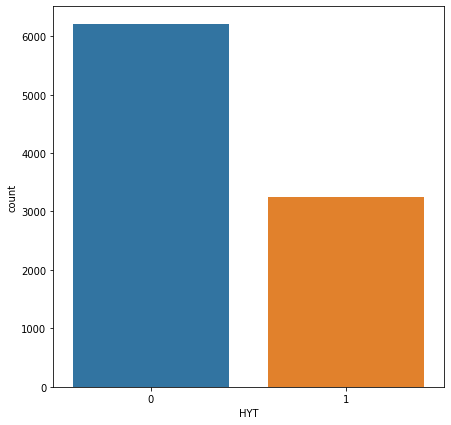

In [51]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(x='HYT', data = data)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9457 entries, 2 to 10738
Data columns (total 9 columns):
SEQN        9457 non-null float64
RIAGENDR    9457 non-null float64
RIDAGEYR    9457 non-null float64
RIDRETH1    9457 non-null float64
BMXBMI      9457 non-null float64
DIQ010      9457 non-null float64
SMQ020      9457 non-null float64
KIQ022      9457 non-null float64
HYT         9457 non-null object
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [53]:
data['HYT'] = data['HYT'].astype(float)

In [54]:
data['RIAGENDR'].value_counts()

2.0    4878
1.0    4579
Name: RIAGENDR, dtype: int64

In [55]:
data['RIDRETH1'].value_counts()

3.0    3203
4.0    2064
5.0    1631
1.0    1477
2.0    1082
Name: RIDRETH1, dtype: int64

In [56]:
data['DIQ010'].value_counts()

2.0    7786
1.0    1413
3.0     251
9.0       7
Name: DIQ010, dtype: int64

In [57]:
data.drop(data[data['DIQ010'] == 9].index, inplace = True)

In [58]:
data['DIQ010'].value_counts()

2.0    7786
1.0    1413
3.0     251
Name: DIQ010, dtype: int64

In [59]:
data['SMQ020'].value_counts()

2.0    5455
1.0    3987
9.0       7
7.0       1
Name: SMQ020, dtype: int64

In [60]:
data.drop(data[data['SMQ020'] == 7].index, inplace = True)
data.drop(data[data['SMQ020'] == 9].index, inplace = True)

In [61]:
data['KIQ022'].value_counts()

2.0    9070
1.0     361
9.0      11
Name: KIQ022, dtype: int64

In [62]:
data.drop(data[data['KIQ022'] == 9].index, inplace = True)

In [63]:
data['KIQ022'].value_counts()

2.0    9070
1.0     361
Name: KIQ022, dtype: int64

In [64]:
data['HYT'].value_counts()

0.0    6189
1.0    3242
Name: HYT, dtype: int64

In [65]:
data.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
2,93709.0,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0.0
3,93711.0,1.0,56.0,5.0,21.3,2.0,2.0,2.0,0.0
4,93713.0,1.0,67.0,3.0,23.5,2.0,1.0,2.0,0.0
6,93715.0,1.0,71.0,5.0,22.5,2.0,1.0,2.0,0.0
7,93716.0,1.0,61.0,5.0,30.7,2.0,1.0,2.0,0.0


In [66]:
data.drop(['SEQN'],axis=1,inplace=True)

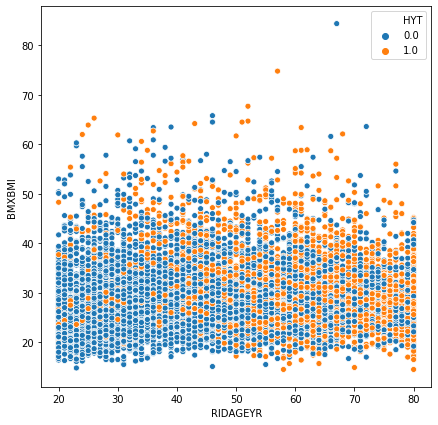

In [67]:

import pandas as pd
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.scatterplot(data = data, x ='RIDAGEYR', y = 'BMXBMI', hue = 'HYT')

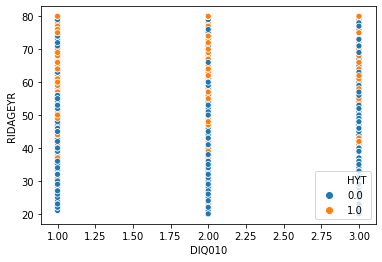

In [68]:

import pandas as pd
import seaborn as sns
sns.scatterplot(data = data, x ='DIQ010', y = 'RIDAGEYR', hue = 'HYT')

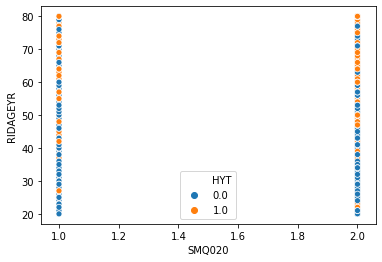

In [69]:

import pandas as pd
import seaborn as sns
#I read the csv churn data into variable called df. Here I would only use two continuous features CreditScore and Age with the target Exited
sns.scatterplot(data = data, x ='SMQ020', y = 'RIDAGEYR', hue = 'HYT')

# Drop the Outliers present in Majority class

In [70]:
rslt_df = data[data['HYT'] == 0]

In [71]:
rslt_df.shape

(6189, 8)

In [73]:

Q1 = rslt_df.quantile(0.25)
Q3 = rslt_df.quantile(0.75)
IQR = Q3 - Q1

In [74]:
(rslt_df > (Q3 + 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI      145
DIQ010      148
SMQ020        0
KIQ022        0
HYT           0
dtype: int64

In [75]:
(rslt_df < (Q1 - 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI        0
DIQ010      718
SMQ020        0
KIQ022      164
HYT           0
dtype: int64

In [76]:
rslt_df['DIQ010'].value_counts()

2.0    5323
1.0     718
3.0     148
Name: DIQ010, dtype: int64

In [77]:
rslt_df['KIQ022'].value_counts()

2.0    6025
1.0     164
Name: KIQ022, dtype: int64

In [78]:
rslt_out = rslt_df[~((rslt_df < (Q1 - 1.5 * IQR)) |(rslt_df > (Q3 + 1.5 * IQR))).any(axis=1)]
rslt_out.shape

(5121, 8)

In [79]:
rslt_out.shape

(5121, 8)

In [80]:
rslt_df.shape

(6189, 8)

# Drop outliers in minority class

In [82]:
rslt_df_min = data[data['HYT'] == 1]
rslt_df_min.shape

(3242, 8)

In [83]:
Q1 = rslt_df_min.quantile(0.25)
Q3 = rslt_df_min.quantile(0.75)
IQR = Q3 - Q1

In [84]:
(rslt_df_min > (Q3 + 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI      106
DIQ010      102
SMQ020        0
KIQ022        0
HYT           0
dtype: int64

In [85]:
(rslt_df_min < (Q1 - 1.5 * IQR)).sum()

RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
BMXBMI        0
DIQ010      691
SMQ020        0
KIQ022      197
HYT           0
dtype: int64

In [86]:
rslt_df_min['DIQ010'].value_counts()

2.0    2449
1.0     691
3.0     102
Name: DIQ010, dtype: int64

In [87]:
rslt_df_min['KIQ022'].value_counts()

2.0    3045
1.0     197
Name: KIQ022, dtype: int64

In [88]:
Q1 = rslt_df_min["BMXBMI"].quantile(0.25)
Q3 = rslt_df_min["BMXBMI"].quantile(0.75)
IQR = Q3 - Q1

In [89]:
rslt_out_min = rslt_df_min[~((rslt_df_min["BMXBMI"] < (Q1 - 1.5 * IQR)) | (rslt_df_min["BMXBMI"] > (Q3 + 1.5 * IQR)))]

In [90]:
rslt_out_min.shape

(3136, 8)

# class overlap

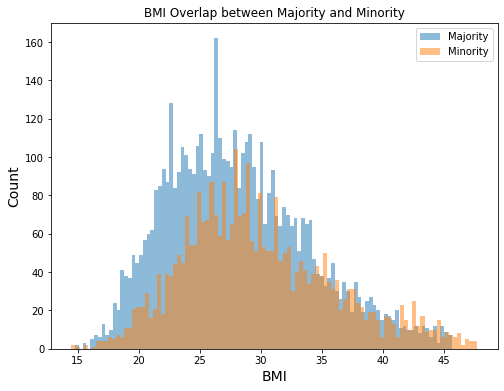

In [92]:
plt.figure(figsize=(8,6))
plt.hist(rslt_out['BMXBMI'], bins=100, alpha=0.5, label="Majority")
plt.hist(rslt_out_min['BMXBMI'], bins=100, alpha=0.5, label="Minority")
plt.xlabel("BMI", size=14)
plt.ylabel("Count", size=14)
plt.title("BMI Overlap between Majority and Minority")
plt.legend(loc='upper right')

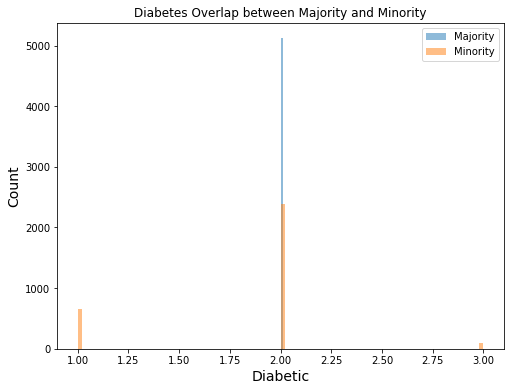

In [93]:
plt.figure(figsize=(8,6))
plt.hist(rslt_out['DIQ010'], bins=100, alpha=0.5, label="Majority")
plt.hist(rslt_out_min['DIQ010'], bins=100, alpha=0.5, label="Minority")
plt.xlabel("Diabetic", size=14)
plt.ylabel("Count", size=14)
plt.title("Diabetes Overlap between Majority and Minority")
plt.legend(loc='upper right')

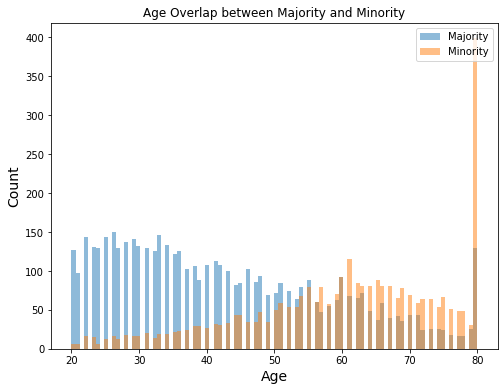

In [94]:
plt.figure(figsize=(8,6))
plt.hist(rslt_out['RIDAGEYR'], bins=100, alpha=0.5, label="Majority")
plt.hist(rslt_out_min['RIDAGEYR'], bins=100, alpha=0.5, label="Minority")
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("Age Overlap between Majority and Minority")
plt.legend(loc='upper right')

# final_data used for model testing

In [95]:
frames = [rslt_out, rslt_out_min]

final_data = pd.concat(frames)

In [96]:
final_data.shape

(8257, 8)

# Data Visualization

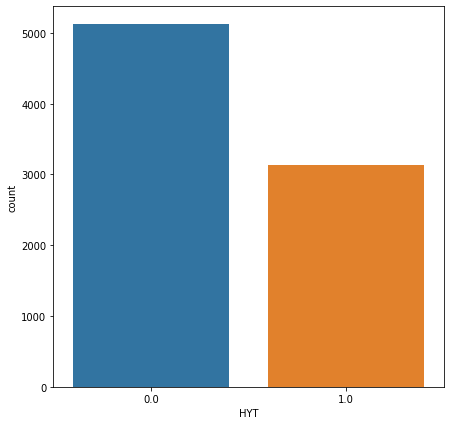

In [100]:
plt.figure(figsize=(7,7))
sns.countplot(x='HYT', data = final_data)

In [101]:
final_data['HYT'].value_counts()

0.0    5121
1.0    3136
Name: HYT, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019233D5F948>,
      dtype=object)

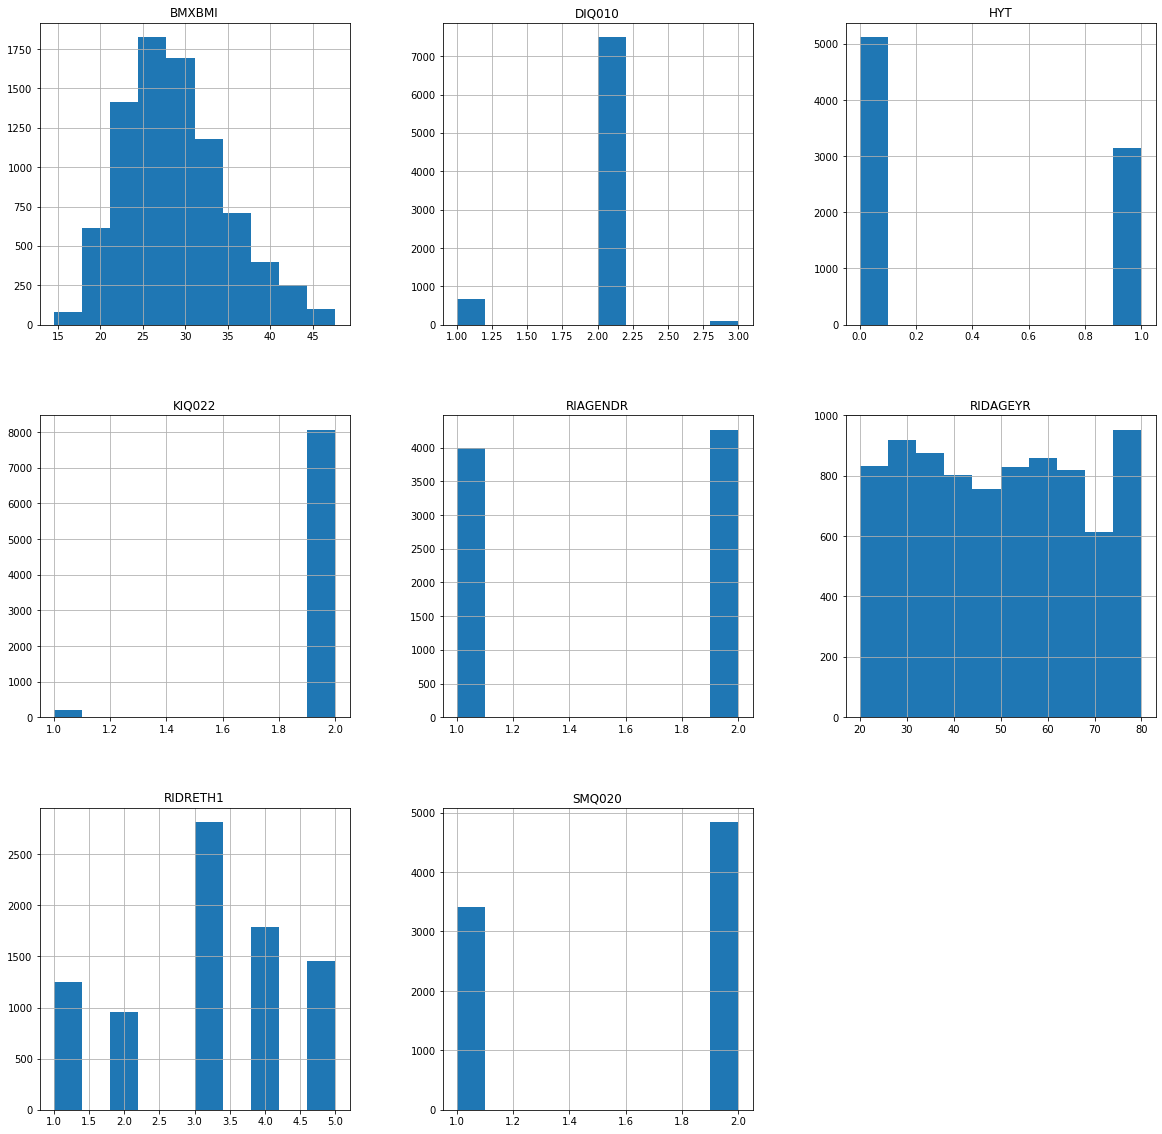

In [102]:
final_data.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019233D5FE08>,
      dtype=object)

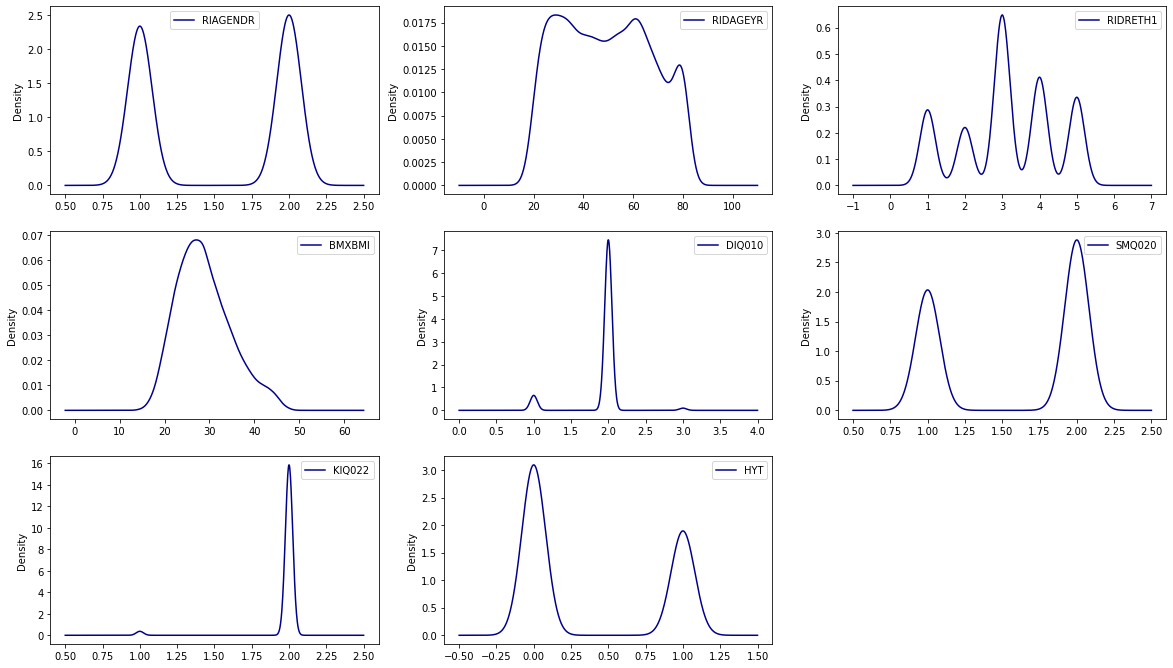

In [103]:
final_data.plot(kind = 'density', subplots=True, layout=(5,3), sharex = False, figsize=(20,20), color = 'darkblue' )

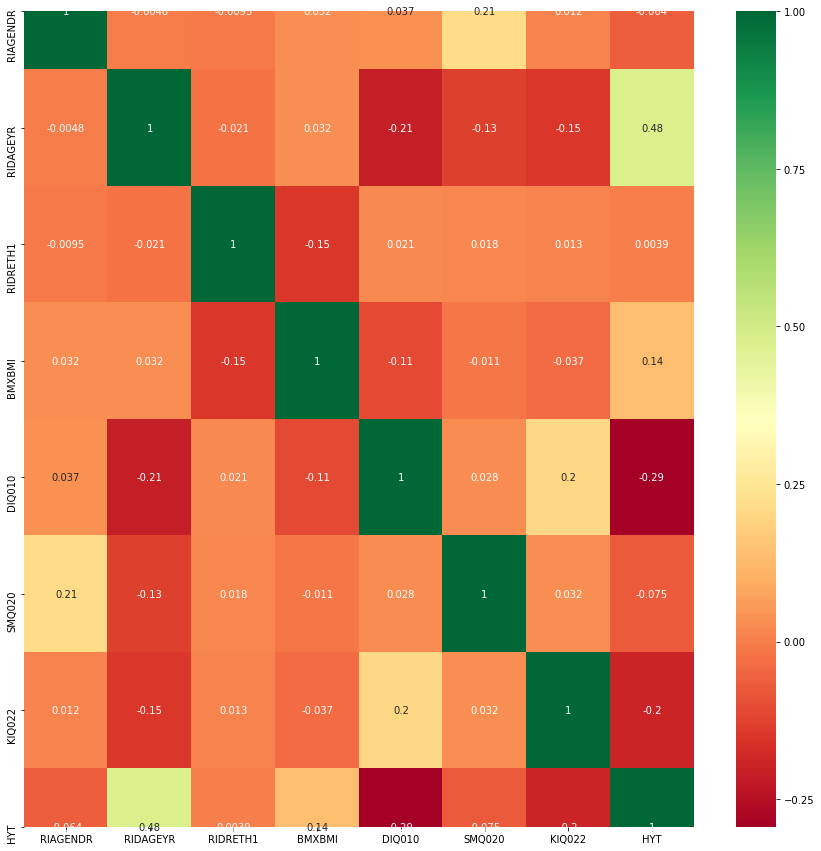

In [104]:
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(final_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')


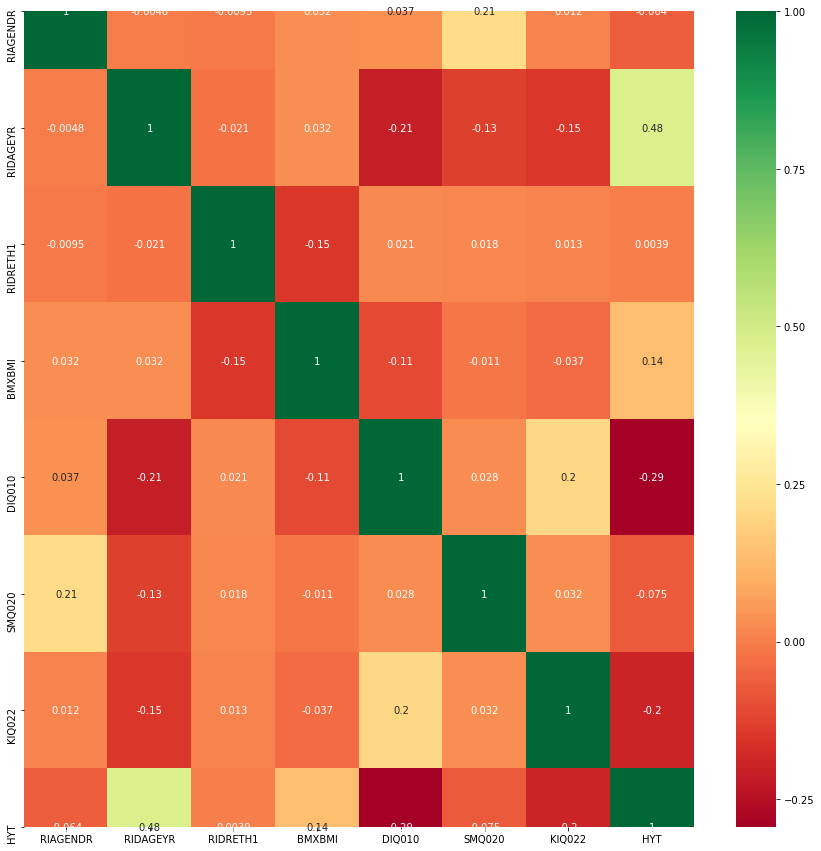

In [105]:
corrmat = final_data.corr(method = 'spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(final_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

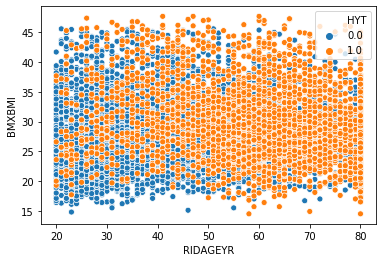

In [106]:

import pandas as pd
import seaborn as sns
sns.scatterplot(data = final_data, x ='RIDAGEYR', y = 'BMXBMI', hue = 'HYT')

In [107]:
final_data.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
2,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0.0
3,1.0,56.0,5.0,21.3,2.0,2.0,2.0,0.0
4,1.0,67.0,3.0,23.5,2.0,1.0,2.0,0.0
6,1.0,71.0,5.0,22.5,2.0,1.0,2.0,0.0
7,1.0,61.0,5.0,30.7,2.0,1.0,2.0,0.0


In [108]:
final_data.tail()

,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
10715,1.0,62.0,1.0,25.1,2.0,1.0,2.0,1.0
10718,1.0,39.0,1.0,26.0,2.0,2.0,2.0,1.0
10727,2.0,72.0,4.0,23.4,2.0,1.0,1.0,1.0
10731,2.0,69.0,1.0,28.1,1.0,2.0,2.0,1.0
10736,2.0,80.0,3.0,31.0,2.0,1.0,2.0,1.0


In [109]:
final_data_numpy = final_data.values

In [110]:
final_data_numpy.shape

(8257, 8)

In [111]:
final_data_numpy[0]

array([ 2. , 75. ,  4. , 38.9,  2. ,  1. ,  2. ,  0. ])

# Split data for training and testing

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(final_data_numpy[:,:-1], final_data_numpy[:,-1], test_size=0.20, stratify=final_data_numpy[:,-1])

In [114]:
print(X_train1.shape)
print(X_test1.shape)

(6605, 7)
(1652, 7)


In [115]:
final_data_train = np.column_stack([X_train1, Y_train1])

# SEPARATING Majoritity and Minority data

In [116]:
Maj_data = final_data_train[np.nonzero(final_data_train[:,-1]==0)]

In [117]:
Maj_data.shape

(4096, 8)

In [118]:
Maj_data[0]

array([ 2. , 49. ,  2. , 29.2,  2. ,  2. ,  2. ,  0. ])

In [119]:
fm_maj = pd.DataFrame(Maj_data[:,-1])

In [120]:
fm_maj.rename(columns = {0:'Majority'}, inplace = True)

In [121]:
Min_data = final_data_train[np.nonzero(final_data_train[:,-1]==1)]

In [122]:
Min_data.shape

(2509, 8)

In [123]:
Min_data[0]

array([ 1. , 42. ,  4. , 31.8,  2. ,  2. ,  2. ,  1. ])

In [124]:
fm_min = pd.DataFrame(Min_data[:,-1])
fm_min.rename(columns = {0:'Minority'}, inplace = True)

In [125]:
fm_div = pd.concat([fm_maj, fm_min], axis=1)
fm_div.head(1)

,Majority,Minority
0,0.0,1.0


In [126]:
fm_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 2 columns):
Majority    4096 non-null float64
Minority    2509 non-null float64
dtypes: float64(2)
memory usage: 64.1 KB


C:\Users\kajal\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


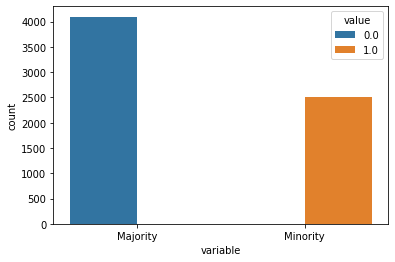

In [127]:
df_fm = pd.melt(fm_div)
sns.countplot(data=df_fm.loc[df_fm['value']!="NO"], x='variable', hue='value')

# K-Means on Minority data

In [128]:
from sklearn.cluster import KMeans

In [129]:
Min_data_cluster = Min_data[:, :-1]
#final_data_cluster = final_data_train[:, :-1]

In [130]:
Min_data_cluster.shape

(2509, 7)

In [131]:
Min_data_class = Min_data[:,-1]

In [132]:
Min_data_class.shape

(2509,)

In [133]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

In [134]:
# fitting the k means algorithm on scaled data
kmeans.fit(Min_data_cluster)


KMeans(n_clusters=2)

In [135]:
# inertia on the fitted data
kmeans.inertia_


276085.9640444559

In [136]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(Min_data_cluster)
    SSE.append(kmeans.inertia_)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\

Text(0, 0.5, 'Inertia')

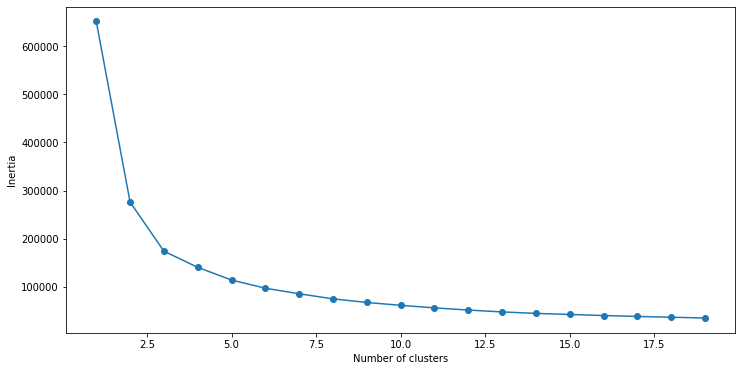

In [137]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [138]:
#We can select K value between 2 to 5 using above curve [k=3 is selected]

In [139]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(Min_data_cluster)
pred = kmeans.predict(Min_data_cluster)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [140]:
from sklearn.metrics import silhouette_score

# Print results
print('kmeans: {}'.format(silhouette_score(Min_data_cluster, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.47848310337303185


In [141]:
final_data.head(1)

,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
2,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0.0


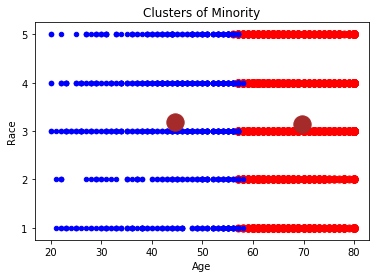

In [143]:
plt.scatter(Min_data_cluster[pred==0, 1], Min_data_cluster[pred==0, 2], s=50, c='red', label ='Cluster 1')
plt.scatter(Min_data_cluster[pred==1, 1], Min_data_cluster[pred==1, 2], s=20, c='blue', label ='Cluster 2')
#plt.scatter(Min_data_cluster[pred==2, 1], Min_data_cluster[pred==2, 2], s=70, c='cyan', label ='Cluster 2')
#plt.scatter(Min_data_cluster[pred==3, 1], Min_data_cluster[pred==3, 2], s=70, c='orange', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Minority')
plt.xlabel('Age')
plt.ylabel('Race')
plt.show()

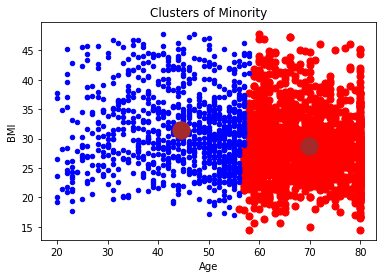

In [144]:
plt.scatter(Min_data_cluster[pred==0, 1], Min_data_cluster[pred==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(Min_data_cluster[pred==1, 1], Min_data_cluster[pred==1, 3], s=20, c='blue', label ='Cluster 2')
plt.scatter(Min_data_cluster[pred==2, 1], Min_data_cluster[pred==2, 3], s=70, c='cyan', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Minority')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [145]:
Min_concat = np.column_stack([Min_data_cluster, Min_data_class])
print(Min_concat.shape)
print(Min_concat[0])

(2509, 8)
[ 1.  42.   4.  31.8  2.   2.   2.   1. ]


In [146]:

frame_min = pd.DataFrame(Min_concat)
frame_min['cluster'] = pred
frame_min['cluster'].value_counts()


0    1584
1     925
Name: cluster, dtype: int64

In [147]:
frame_min.head()

,0,1,2,3,4,5,6,7,cluster
0,1.0,42.0,4.0,31.8,2.0,2.0,2.0,1.0,1
1,2.0,61.0,5.0,19.0,2.0,2.0,2.0,1.0,0
2,1.0,26.0,4.0,22.5,2.0,1.0,2.0,1.0,1
3,1.0,53.0,4.0,26.1,2.0,1.0,2.0,1.0,1
4,2.0,60.0,1.0,35.9,2.0,2.0,2.0,1.0,0


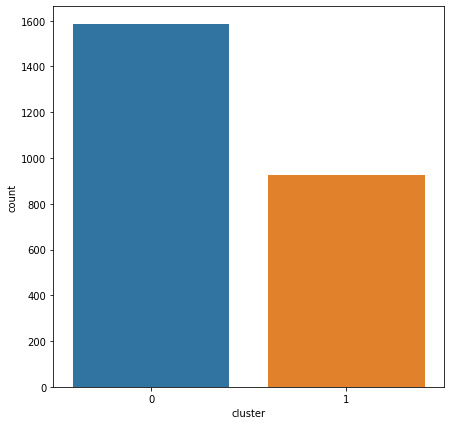

In [148]:
plt.figure(figsize=(7,7))
sns.countplot(x="cluster", data = frame_min)

In [149]:
original = frame_min.values
print(original.shape)
print(original[0])

(2509, 9)
[ 1.  42.   4.  31.8  2.   2.   2.   1.   1. ]


In [150]:
print(original[0])

[ 1.  42.   4.  31.8  2.   2.   2.   1.   1. ]


# K-means on Majority data

In [151]:
Maj_cluster = Maj_data[:, :-1]
Maj_class = Maj_data[:,-1]
print(Maj_cluster.shape)
print(Maj_class.shape)

(4096, 7)
(4096,)


In [152]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

In [153]:
# fitting the k means algorithm on scaled data
kmeans.fit(Maj_cluster)

KMeans(n_clusters=2)

In [154]:
# inertia on the fitted data
kmeans.inertia_

439762.18040469923

In [155]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(Maj_cluster)
    SSE.append(kmeans.inertia_)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\kajal\

Text(0, 0.5, 'Inertia')

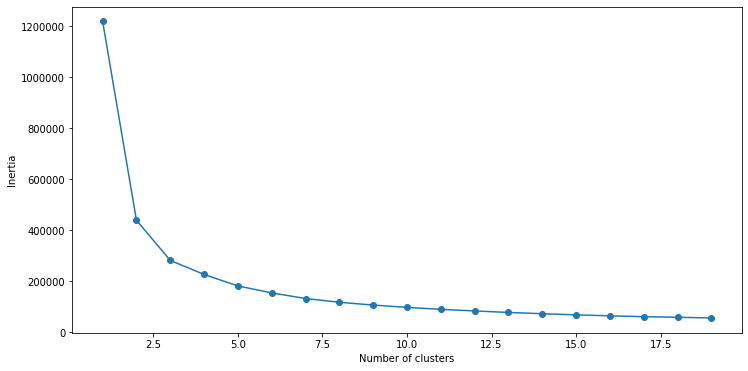

In [156]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [157]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(Maj_cluster)
pred = kmeans.predict(Maj_cluster)


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [158]:
from sklearn.metrics import silhouette_score

# Print results
print('kmeans: {}'.format(silhouette_score(Maj_cluster, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.5299337736492971


In [159]:
final_data.head(1)

,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
2,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0.0


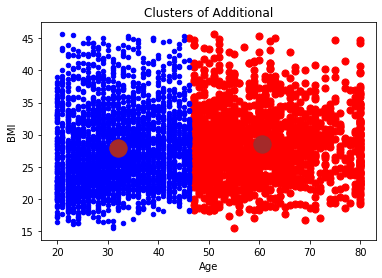

In [162]:
plt.scatter(Maj_cluster[pred==0, 1], Maj_cluster[pred==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(Maj_cluster[pred==1, 1], Maj_cluster[pred==1, 3], s=20, c='blue', label ='Cluster 2')
plt.scatter(Maj_cluster[pred==2, 1], Maj_cluster[pred==2, 3], s=70, c='cyan', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Additional')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [163]:
Maj_concat = np.column_stack([Maj_cluster, Maj_class])
print(Maj_concat.shape)
print(Maj_concat[0])

(4096, 8)
[ 2.  49.   2.  29.2  2.   2.   2.   0. ]


In [164]:
frame_maj = pd.DataFrame(Maj_concat)
frame_maj['cluster'] = pred
frame_maj['cluster'].value_counts()

1    2566
0    1530
Name: cluster, dtype: int64

In [165]:
frame_maj.head()

,0,1,2,3,4,5,6,7,cluster
0,2.0,49.0,2.0,29.2,2.0,2.0,2.0,0.0,0
1,2.0,46.0,5.0,21.9,2.0,1.0,2.0,0.0,1
2,2.0,56.0,3.0,29.7,2.0,1.0,2.0,0.0,0
3,2.0,23.0,5.0,21.4,2.0,2.0,2.0,0.0,1
4,1.0,51.0,4.0,26.0,2.0,1.0,2.0,0.0,0


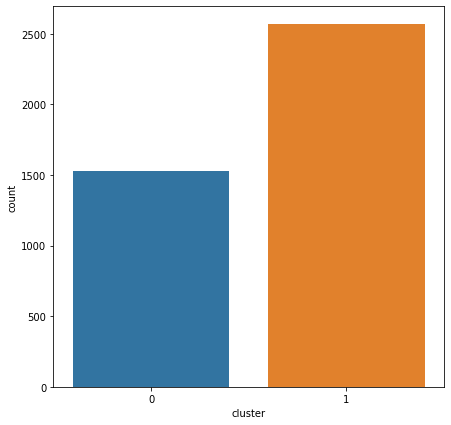

In [166]:
plt.figure(figsize=(7,7))
sns.countplot(x="cluster", data = frame_maj)

In [167]:
original_maj = frame_maj.values
print(original_maj.shape)
print(original_maj[0])

(4096, 9)
[ 2.  49.   2.  29.2  2.   2.   2.   0.   0. ]


In [168]:
original_maj_C0 = original_maj[np.nonzero(original_maj[:,-1]==0)]
original_maj_C1 = original_maj[np.nonzero(original_maj[:,-1]==1)]
#original_maj_C2 = original_maj[np.nonzero(original_maj[:,-1]==2)]

In [169]:
print("C0",original_maj_C0.shape)
print("C1",original_maj_C1.shape)
#print("C2",original_maj_C2.shape)

C0 (1530, 9)
C1 (2566, 9)


In [170]:
original_C0 = original[np.nonzero(original[:,-1]==0)]
original_C1 = original[np.nonzero(original[:,-1]==1)]
#original_C2 = original[np.nonzero(original[:,-1]==2)]
print("C0",original_C0.shape)
print("C1",original_C1.shape)
#print("C2",original_C2.shape)

C0 (1584, 9)
C1 (925, 9)


# Combine Minority Cluster with Majority cluster

In [171]:
#Min Clus-0 Maj Clus-0
MM_C00 = np.concatenate((original_maj_C0, original_C0))
#Min Clus-0 Maj Clus-1
MM_C01 = np.concatenate((original_maj_C1, original_C0))

In [172]:
print("C0",MM_C00.shape)
print("C1",MM_C01.shape)
#print("C2",MM_C02.shape)

C0 (3114, 9)
C1 (4150, 9)


In [173]:
MM_C00 = MM_C00[:, :-1]
MM_C01 = MM_C01[:, :-1]
#MM_C02 = MM_C02[:, :-1]
print("C0",MM_C00.shape)
print("C1",MM_C01.shape)
#print("C2",MM_C02.shape)

C0 (3114, 8)
C1 (4150, 8)


In [174]:
#Min Clus-1 Maj Clus-0
MM_C10 = np.concatenate((original_maj_C0, original_C1))
#Min Clus-1 Maj Clus-1
MM_C11 = np.concatenate((original_maj_C1, original_C1))

In [175]:
print("C0",MM_C10.shape)
print("C1",MM_C11.shape)
#print("C2",MM_C12.shape)

C0 (2455, 9)
C1 (3491, 9)


In [176]:
MM_C10 = MM_C10[:, :-1]
MM_C11 = MM_C11[:, :-1]
#MM_C12 = MM_C12[:, :-1]
print("C0",MM_C10.shape)
print("C1",MM_C11.shape)
#print("C2",MM_C12.shape)

C0 (2455, 8)
C1 (3491, 8)


# K-means on each grouped cluster data 

In [177]:
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(MM_C00[:,:-1])
pred = kmeans.predict(MM_C00[:,:-1])
from sklearn.metrics import silhouette_score

# Print results
print('kmeans: {}'.format(silhouette_score(MM_C00[:,:-1], kmeans.labels_, 
                                           metric='euclidean')))

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans: 0.4349736971983925


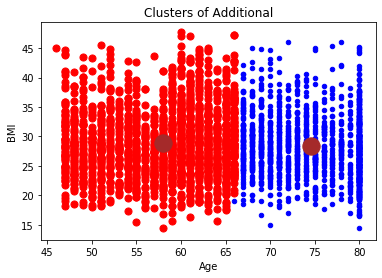

In [178]:
plt.scatter(MM_C00[pred==0, 1], MM_C00[pred==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(MM_C00[pred==1, 1], MM_C00[pred==1, 3], s=20, c='blue', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Additional')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [179]:

kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(MM_C01[:,:-1])
pred = kmeans.predict(MM_C01[:,:-1])
from sklearn.metrics import silhouette_score

# Print results
print('kmeans: {}'.format(silhouette_score(MM_C01[:,:-1], kmeans.labels_, 
                                           metric='euclidean')))

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans: 0.6669162319490209


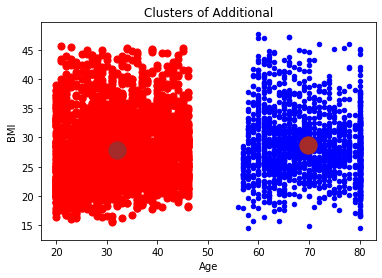

In [180]:
plt.scatter(MM_C01[pred==0, 1], MM_C01[pred==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(MM_C01[pred==1, 1], MM_C01[pred==1, 3], s=20, c='blue', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Additional')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [182]:
#max clus 01

In [183]:

kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(MM_C10[:,:-1])
pred = kmeans.predict(MM_C10[:,:-1])
from sklearn.metrics import silhouette_score

# Print results
print('kmeans: {}'.format(silhouette_score(MM_C10[:,:-1], kmeans.labels_, 
                                           metric='euclidean')))

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans: 0.40414261515220334


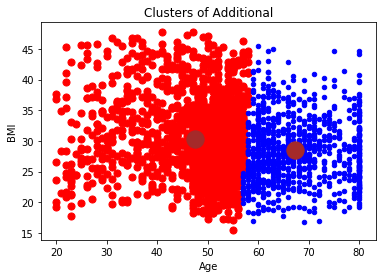

In [184]:
plt.scatter(MM_C10[pred==0, 1], MM_C10[pred==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(MM_C10[pred==1, 1], MM_C10[pred==1, 3], s=20, c='blue', label ='Cluster 2')
plt.scatter(MM_C10[pred==2, 1], MM_C10[pred==2, 3], s=70, c='cyan', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Additional')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [185]:
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(MM_C11[:,:-1])
pred = kmeans.predict(MM_C11[:,:-1])
from sklearn.metrics import silhouette_score

# Print results
print('kmeans: {}'.format(silhouette_score(MM_C11[:,:-1], kmeans.labels_, 
                                           metric='euclidean')))

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans: 0.4260870383383462


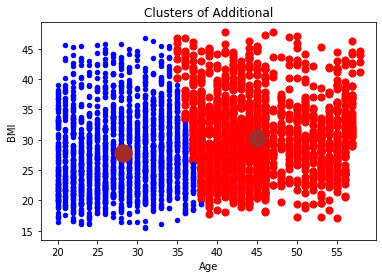

In [186]:
plt.scatter(MM_C11[pred==0, 1], MM_C11[pred==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(MM_C11[pred==1, 1], MM_C11[pred==1, 3], s=20, c='blue', label ='Cluster 2')
plt.scatter(MM_C11[pred==2, 1], MM_C11[pred==2, 3], s=70, c='cyan', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='brown', label = 'Centroids')
plt.title('Clusters of Additional')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Combine Clusters with highest silhouette_score

In [187]:

#frame_MM_C00 = pd.DataFrame(MM_C00)
frame_MM_C01 = pd.DataFrame(MM_C01)
#frame_MM_C10 = pd.DataFrame(MM_C10)
#frame_MM_C11 = pd.DataFrame(MM_C11)

In [190]:
frame_MM_C01[7].value_counts()

0.0    2566
1.0    1584
Name: 7, dtype: int64

0.0    2566
1.0    1584
Name: 7, dtype: int64


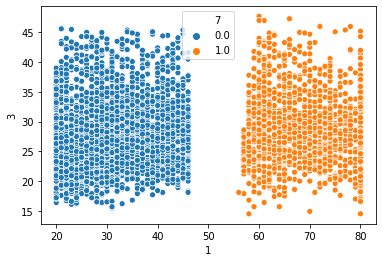

In [197]:
print(frame_MM_C01[7].value_counts())
import pandas as pd
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_MM_C01, x =1, y = 3, hue = 7)

# Combine selected majority cluster with minority data

In [202]:
set1 = np.concatenate((original_maj_C1, original_C0, original_C1))
print(set1.shape)

(5075, 9)


In [203]:
set1 = set1[:, :-1]
print(set1.shape)


(5075, 8)


0.0    2566
1.0    2509
Name: 7, dtype: int64


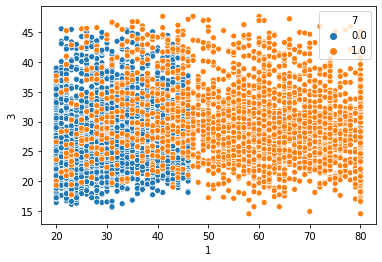

In [204]:
frame_set1 = pd.DataFrame(set1)
print(frame_set1[7].value_counts())
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_set1, x =1, y = 3, hue = 7)

# Single Classifier

In [205]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.calibration import CalibratedClassifierCV
from imblearn.metrics import classification_report_imbalanced

lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(set1[:,:-1], set1[:,-1]) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)



C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7209443099273608
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.85      0.67      0.80      0.75      0.73      0.53      1025
        1.0       0.60      0.80      0.67      0.69      0.73      0.55       627

avg / total       0.75      0.72      0.75      0.73      0.73      0.54      1652



C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [206]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(set1[:,:-1], set1[:,-1]).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)



Naive-Bayes accuracy :  0.7372881355932204
         non-hyt  hyt
non-hyt      960   65
hyt          369  258
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.72      0.94      0.41      0.82      0.62      0.41      1025
        1.0       0.80      0.41      0.94      0.54      0.62      0.37       627

avg / total       0.75      0.74      0.61      0.71      0.62      0.39      1652



In [207]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(set1[:,:-1], set1[:,-1])
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)



KNeighbors accuracy score :  0.7046004842615012
         non-hyt  hyt
non-hyt      643  382
hyt          106  521
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.86      0.63      0.83      0.72      0.72      0.51      1025
        1.0       0.58      0.83      0.63      0.68      0.72      0.53       627

avg / total       0.75      0.70      0.75      0.71      0.72      0.52      1652



In [208]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(set1[:,:-1], set1[:,-1])
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)



Random Forest accuracy score :  0.7039951573849879
         non-hyt  hyt
non-hyt      634  391
hyt           98  529
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.87      0.62      0.84      0.72      0.72      0.51      1025
        1.0       0.57      0.84      0.62      0.68      0.72      0.53       627

avg / total       0.76      0.70      0.76      0.71      0.72      0.52      1652



In [209]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(set1[:,:-1], set1[:,-1])
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))



MLP accuracy score :  0.7142857142857143
[[679 346]
 [126 501]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.84      0.66      0.80      0.74      0.73      0.52      1025
        1.0       0.59      0.80      0.66      0.68      0.73      0.54       627

avg / total       0.75      0.71      0.75      0.72      0.73      0.53      1652



# Apply base classifier on original dataset 

In [223]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lsvm1 = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm1) 
MM_model_p1.fit(X_train1, Y_train1) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)
   
MM_matrix_neigh_sm_p1 = confusion_matrix(Y_test1,MM_model_p1.predict(X_test1))
MM_matrix_neigh_sm_p1 = pd.DataFrame(MM_matrix_neigh_sm_p1, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print("cf",MM_matrix_neigh_sm_p1)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7300242130750605
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.87      0.50      0.80      0.66      0.45      1025
        1.0       0.70      0.50      0.87      0.58      0.66      0.42       627

avg / total       0.73      0.73      0.64      0.72      0.66      0.44      1652

cf          non-hyt  hyt
non-hyt      892  133
hyt          313  314


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [224]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(X_train1, Y_train1).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)



Naive-Bayes accuracy :  0.7227602905569007
         non-hyt  hyt
non-hyt     1025    0
hyt          458  169
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      1.00      0.27      0.82      0.52      0.29      1025
        1.0       1.00      0.27      1.00      0.42      0.52      0.25       627

avg / total       0.81      0.72      0.55      0.67      0.52      0.27      1652



In [225]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(X_train1, Y_train1)
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)


KNeighbors accuracy score :  0.7058111380145279
         non-hyt  hyt
non-hyt      836  189
hyt          297  330
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.82      0.53      0.77      0.66      0.44      1025
        1.0       0.64      0.53      0.82      0.58      0.66      0.42       627

avg / total       0.70      0.71      0.64      0.70      0.66      0.43      1652



In [226]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(X_train1, Y_train1)
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)

yhat =clf_p31.predict_proba(X_test1)
pos_probs = yhat[:, 1]

# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test1, pos_probs)
auc_score = auc(recall, precision)
print(' AUC: %.3f' % auc_score)

Random Forest accuracy score :  0.7372881355932204
         non-hyt  hyt
non-hyt      856  169
hyt          265  362
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.84      0.58      0.80      0.69      0.49      1025
        1.0       0.68      0.58      0.84      0.63      0.69      0.47       627

avg / total       0.73      0.74      0.68      0.73      0.69      0.49      1652

 AUC: 0.746


In [227]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(X_train1, Y_train1)
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))



MLP accuracy score :  0.7360774818401937
[[840 185]
 [251 376]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.77      0.82      0.60      0.79      0.70      0.50      1025
        1.0       0.67      0.60      0.82      0.63      0.70      0.48       627

avg / total       0.73      0.74      0.68      0.73      0.70      0.49      1652



# Smote with base classifier on original dataset

Counter({0.0: 4096, 1.0: 2509})
Counter({1.0: 4096, 0.0: 4096})
(8192, 8)


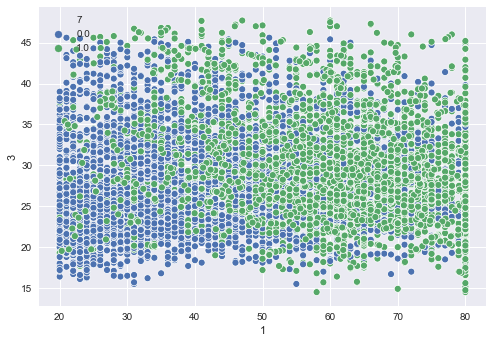

In [231]:
# Apply SMOTE
counter = Counter(Y_train1)
print(counter)
X_train1_sm, Y_train1_sm = sm.fit_sample(X_train1, Y_train1.ravel())
counter = Counter(Y_train1_sm)
print(counter)
sm_or = np.column_stack([X_train1_sm, Y_train1_sm])
print(sm_or.shape)

frame_sm_or = pd.DataFrame(sm_or)
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_sm_or, x =1, y = 3, hue = 7)

In [232]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lsvm1 = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm1) 
MM_model_p1.fit(X_train1_sm, Y_train1_sm) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)
   
MM_matrix_neigh_sm_p1 = confusion_matrix(Y_test1,MM_model_p1.predict(X_test1))
MM_matrix_neigh_sm_p1 = pd.DataFrame(MM_matrix_neigh_sm_p1, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print("cf",MM_matrix_neigh_sm_p1)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7354721549636803
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.81      0.75      0.71      0.78      0.73      0.54      1025
        1.0       0.63      0.71      0.75      0.67      0.73      0.53       627

avg / total       0.74      0.74      0.73      0.74      0.73      0.54      1652

cf          non-hyt  hyt
non-hyt      767  258
hyt          179  448


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [233]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(X_train1_sm, Y_train1_sm).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)


Naive-Bayes accuracy :  0.7227602905569007
         non-hyt  hyt
non-hyt     1025    0
hyt          458  169
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      1.00      0.27      0.82      0.52      0.29      1025
        1.0       1.00      0.27      1.00      0.42      0.52      0.25       627

avg / total       0.81      0.72      0.55      0.67      0.52      0.27      1652



In [234]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(X_train1_sm, Y_train1_sm)
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)



KNeighbors accuracy score :  0.6967312348668281
         non-hyt  hyt
non-hyt      729  296
hyt          205  422
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.78      0.71      0.67      0.74      0.69      0.48      1025
        1.0       0.59      0.67      0.71      0.63      0.69      0.48       627

avg / total       0.71      0.70      0.69      0.70      0.69      0.48      1652



In [235]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(X_train1_sm, Y_train1_sm)
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)


Random Forest accuracy score :  0.7324455205811138
         non-hyt  hyt
non-hyt      843  182
hyt          260  367
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.82      0.59      0.79      0.69      0.49      1025
        1.0       0.67      0.59      0.82      0.62      0.69      0.47       627

avg / total       0.73      0.73      0.68      0.73      0.69      0.48      1652



In [236]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(X_train1_sm, Y_train1_sm)
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))


MLP accuracy score :  0.7342615012106537
[[773 252]
 [187 440]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.81      0.75      0.70      0.78      0.73      0.53      1025
        1.0       0.64      0.70      0.75      0.67      0.73      0.53       627

avg / total       0.74      0.73      0.72      0.74      0.73      0.53      1652



# Apply borderline Smote on original dataset

In [241]:
from imblearn.over_sampling import BorderlineSMOTE
bsm = BorderlineSMOTE(random_state=0)
bsm1 = BorderlineSMOTE(random_state=0, kind= 'borderline-1')
bsm2 = BorderlineSMOTE(random_state=0, kind= 'borderline-2')

Counter({0.0: 4096, 1.0: 2509})
Counter({1.0: 4096, 0.0: 4096})
(8192, 8)


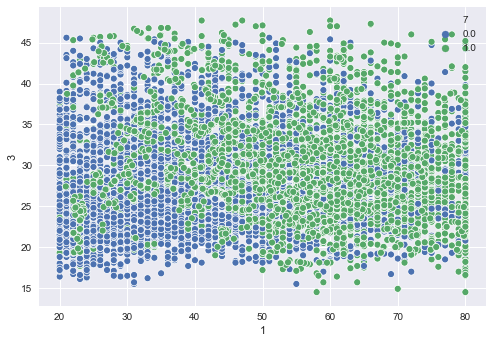

In [244]:
counter = Counter(Y_train1)
print(counter)
X_train1_bm, Y_train1_bm = bsm.fit_resample(X_train1, Y_train1)
counter = Counter(Y_train1_bm)
print(counter)
bm1_or = np.column_stack([X_train1_bm, Y_train1_bm])
print(bm1_or.shape)

frame_bm1_or = pd.DataFrame(bm1_or)
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_bm1_or, x =1, y = 3, hue = 7)

In [245]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lsvm1 = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm1) 
MM_model_p1.fit(X_train1_bm, Y_train1_bm) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)
   
MM_matrix_neigh_sm_p1 = confusion_matrix(Y_test1,MM_model_p1.predict(X_test1))
MM_matrix_neigh_sm_p1 = pd.DataFrame(MM_matrix_neigh_sm_p1, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print("cf",MM_matrix_neigh_sm_p1)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7148910411622276
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.81      0.71      0.72      0.76      0.72      0.51      1025
        1.0       0.60      0.72      0.71      0.66      0.72      0.51       627

avg / total       0.73      0.71      0.72      0.72      0.72      0.51      1652

cf          non-hyt  hyt
non-hyt      730  295
hyt          176  451


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [246]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(X_train1_bm, Y_train1_bm).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)


Naive-Bayes accuracy :  0.7227602905569007
         non-hyt  hyt
non-hyt     1025    0
hyt          458  169
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      1.00      0.27      0.82      0.52      0.29      1025
        1.0       1.00      0.27      1.00      0.42      0.52      0.25       627

avg / total       0.81      0.72      0.55      0.67      0.52      0.27      1652



In [247]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(X_train1_bm, Y_train1_bm)
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)


KNeighbors accuracy score :  0.6731234866828087
         non-hyt  hyt
non-hyt      683  342
hyt          198  429
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.78      0.67      0.68      0.72      0.68      0.46      1025
        1.0       0.56      0.68      0.67      0.61      0.68      0.46       627

avg / total       0.69      0.67      0.68      0.68      0.68      0.46      1652



In [248]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(X_train1_bm, Y_train1_bm)
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)

Random Forest accuracy score :  0.7294188861985472
         non-hyt  hyt
non-hyt      829  196
hyt          251  376
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.77      0.81      0.60      0.79      0.70      0.50      1025
        1.0       0.66      0.60      0.81      0.63      0.70      0.47       627

avg / total       0.73      0.73      0.68      0.73      0.70      0.49      1652



In [249]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(X_train1_bm, Y_train1_bm)
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))

MLP accuracy score :  0.7046004842615012
[[638 387]
 [101 526]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.86      0.62      0.84      0.72      0.72      0.51      1025
        1.0       0.58      0.84      0.62      0.68      0.72      0.53       627

avg / total       0.75      0.70      0.76      0.71      0.72      0.52      1652



In [253]:
X_train1.shape

(6605, 7)

In [254]:
Y_train1.shape

(6605,)

In [255]:
X_train1[0]

array([ 1. , 42. ,  4. , 31.8,  2. ,  2. ,  2. ])

In [256]:
Y_train1[0]

1.0

# K-means SMOTE

Counter({0.0: 4096, 1.0: 2509})
Counter({1.0: 4097, 0.0: 4096})
(8193, 8)


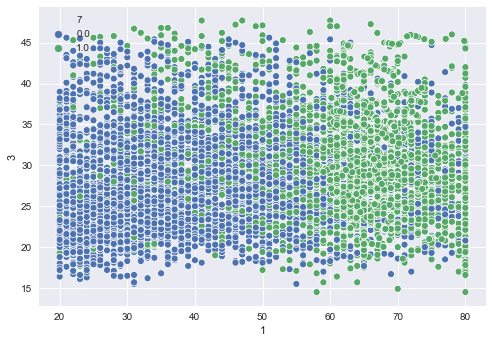

In [258]:
#####K-means SMOTE Original
from imblearn.over_sampling import KMeansSMOTE
ksm = KMeansSMOTE()
counter = Counter(Y_train1)
print(counter)
X_train1_ksm, Y_train1_ksm = ksm.fit_resample(X_train1, Y_train1)
counter = Counter(Y_train1_ksm)
print(counter)
ksm_or = np.column_stack([X_train1_ksm, Y_train1_ksm])
print(ksm_or.shape)

frame_ksm_or = pd.DataFrame(ksm_or)
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_ksm_or, x =1, y = 3, hue = 7)

In [259]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lsvm1 = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm1) 
MM_model_p1.fit(X_train1_ksm, Y_train1_ksm) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)
   
MM_matrix_neigh_sm_p1 = confusion_matrix(Y_test1,MM_model_p1.predict(X_test1))
MM_matrix_neigh_sm_p1 = pd.DataFrame(MM_matrix_neigh_sm_p1, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print("cf",MM_matrix_neigh_sm_p1)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.736682808716707
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.79      0.78      0.66      0.79      0.72      0.52      1025
        1.0       0.65      0.66      0.78      0.66      0.72      0.51       627

avg / total       0.74      0.74      0.71      0.74      0.72      0.52      1652

cf          non-hyt  hyt
non-hyt      803  222
hyt          213  414


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [260]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(X_train1_ksm, Y_train1_ksm).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)


Naive-Bayes accuracy :  0.7227602905569007
         non-hyt  hyt
non-hyt     1025    0
hyt          458  169
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      1.00      0.27      0.82      0.52      0.29      1025
        1.0       1.00      0.27      1.00      0.42      0.52      0.25       627

avg / total       0.81      0.72      0.55      0.67      0.52      0.27      1652



In [261]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(X_train1_ksm, Y_train1_ksm)
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)


KNeighbors accuracy score :  0.7179176755447942
         non-hyt  hyt
non-hyt      805  220
hyt          246  381
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.77      0.79      0.61      0.78      0.69      0.49      1025
        1.0       0.63      0.61      0.79      0.62      0.69      0.47       627

avg / total       0.72      0.72      0.68      0.72      0.69      0.48      1652



In [262]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(X_train1_ksm, Y_train1_ksm)
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)

Random Forest accuracy score :  0.7336561743341404
         non-hyt  hyt
non-hyt      847  178
hyt          262  365
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.83      0.58      0.79      0.69      0.49      1025
        1.0       0.67      0.58      0.83      0.62      0.69      0.47       627

avg / total       0.73      0.73      0.67      0.73      0.69      0.48      1652



In [263]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(X_train1_ksm, Y_train1_ksm)
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))

MLP accuracy score :  0.7324455205811138
[[758 267]
 [175 452]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.81      0.74      0.72      0.77      0.73      0.53      1025
        1.0       0.63      0.72      0.74      0.67      0.73      0.53       627

avg / total       0.74      0.73      0.73      0.74      0.73      0.53      1652



# SVM SMOTE

In [267]:
####SVM SMOTE
from imblearn.over_sampling import SVMSMOTE 
svmsm = SVMSMOTE(random_state=0)

Counter({0.0: 4096, 1.0: 2509})
Counter({1.0: 4096, 0.0: 4096})
(8192, 8)


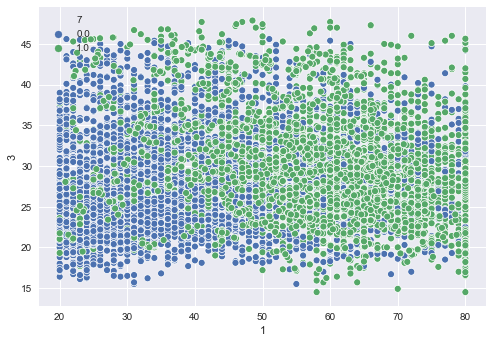

In [268]:
####SVM SMOTE 
counter = Counter(Y_train1)
print(counter)
X1_svmsm_or, y1_svmsm_or = svmsm.fit_resample(X_train1, Y_train1)
counter = Counter(y1_svmsm_or)
print(counter)
svmsm1_or = np.column_stack([X1_svmsm_or, y1_svmsm_or])
print(svmsm1_or.shape)

frame_svmsm1_or = pd.DataFrame(svmsm1_or)
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_svmsm1_or, x =1, y = 3, hue = 7)

In [269]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lsvm1 = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm1) 
MM_model_p1.fit(X1_svmsm_or, y1_svmsm_or) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)
   
MM_matrix_neigh_sm_p1 = confusion_matrix(Y_test1,MM_model_p1.predict(X_test1))
MM_matrix_neigh_sm_p1 = pd.DataFrame(MM_matrix_neigh_sm_p1, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print("cf",MM_matrix_neigh_sm_p1)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7300242130750605
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.81      0.74      0.72      0.77      0.73      0.53      1025
        1.0       0.63      0.72      0.74      0.67      0.73      0.53       627

avg / total       0.74      0.73      0.72      0.73      0.73      0.53      1652

cf          non-hyt  hyt
non-hyt      757  268
hyt          178  449


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [270]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(X1_svmsm_or, y1_svmsm_or).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)


Naive-Bayes accuracy :  0.7227602905569007
         non-hyt  hyt
non-hyt     1025    0
hyt          458  169
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      1.00      0.27      0.82      0.52      0.29      1025
        1.0       1.00      0.27      1.00      0.42      0.52      0.25       627

avg / total       0.81      0.72      0.55      0.67      0.52      0.27      1652



In [271]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(X1_svmsm_or, y1_svmsm_or)
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)


KNeighbors accuracy score :  0.6918886198547215
         non-hyt  hyt
non-hyt      725  300
hyt          209  418
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.78      0.71      0.67      0.74      0.69      0.47      1025
        1.0       0.58      0.67      0.71      0.62      0.69      0.47       627

avg / total       0.70      0.69      0.68      0.70      0.69      0.47      1652



In [272]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(X1_svmsm_or, y1_svmsm_or)
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)

Random Forest accuracy score :  0.7342615012106537
         non-hyt  hyt
non-hyt      830  195
hyt          244  383
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.77      0.81      0.61      0.79      0.70      0.50      1025
        1.0       0.66      0.61      0.81      0.64      0.70      0.48       627

avg / total       0.73      0.73      0.69      0.73      0.70      0.50      1652



In [273]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(X1_svmsm_or, y1_svmsm_or)
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))

MLP accuracy score :  0.7263922518159807
[[722 303]
 [149 478]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.83      0.70      0.76      0.76      0.73      0.53      1025
        1.0       0.61      0.76      0.70      0.68      0.73      0.54       627

avg / total       0.75      0.73      0.74      0.73      0.73      0.54      1652



# UnderSampling on original dataset

# Random UnderSampling

Counter({0.0: 4096, 1.0: 2509})
Counter({0.0: 2509, 1.0: 2509})
(5018, 8)


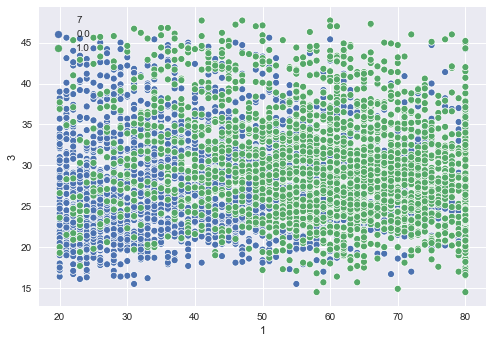

In [278]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
counter = Counter(Y_train1)
print(counter)
X_rus_or, y_rus_or = rus.fit_resample(X_train1, Y_train1)
counter = Counter(y_rus_or)
print(counter)
rus_or = np.column_stack([X_rus_or, y_rus_or])
print(rus_or.shape)

frame_rus_or = pd.DataFrame(rus_or)
import seaborn as sns
#I read the csv churn data into variable called df. 
#df_example2 = data_copy2[['RIDAGEYR', 'BMXBMI', 'HYT']]
sns.scatterplot(data = frame_rus_or, x =1, y = 3, hue = 7)

In [279]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lsvm1 = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm1) 
MM_model_p1.fit(X_rus_or, y_rus_or) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test1) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test1, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test1,  MM_model_p1.predict(X_test1))
print("report : ",MM_report_neigh_sm_p1)
   
MM_matrix_neigh_sm_p1 = confusion_matrix(Y_test1,MM_model_p1.predict(X_test1))
MM_matrix_neigh_sm_p1 = pd.DataFrame(MM_matrix_neigh_sm_p1, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print("cf",MM_matrix_neigh_sm_p1)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7276029055690073
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.80      0.74      0.71      0.77      0.72      0.52      1025
        1.0       0.62      0.71      0.74      0.66      0.72      0.52       627

avg / total       0.74      0.73      0.72      0.73      0.72      0.52      1652

cf          non-hyt  hyt
non-hyt      759  266
hyt          184  443


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [280]:
from sklearn.naive_bayes import GaussianNB
MM_gnb_p11 = GaussianNB()
MM_pred_p11 = MM_gnb_p11.fit(X_rus_or, y_rus_or).predict(X_test1)
print("Naive-Bayes accuracy : ",accuracy_score(Y_test1, MM_pred_p11, normalize = True))
MM_matrix_p11 = confusion_matrix(Y_test1,MM_gnb_p11.predict(X_test1))
MM_matrix_p11 = pd.DataFrame(MM_matrix_p11, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_p11)

MM_report_p11 = classification_report_imbalanced(Y_test1, MM_gnb_p11.predict(X_test1))
print(MM_report_p11)


Naive-Bayes accuracy :  0.7227602905569007
         non-hyt  hyt
non-hyt     1025    0
hyt          458  169
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      1.00      0.27      0.82      0.52      0.29      1025
        1.0       1.00      0.27      1.00      0.42      0.52      0.25       627

avg / total       0.81      0.72      0.55      0.67      0.52      0.27      1652



In [281]:
from sklearn.neighbors import KNeighborsClassifier
MM_neigh_p22 = KNeighborsClassifier(n_neighbors=5)
MM_neigh_p22.fit(X_rus_or, y_rus_or)
MM_pred_neigh_p22 = MM_neigh_p22.predict(X_test1)
print ("KNeighbors accuracy score : ",accuracy_score(Y_test1, MM_pred_neigh_p22))
MM_matrix_neigh_p22 = confusion_matrix(Y_test1,MM_neigh_p22.predict(X_test1))
MM_matrix_neigh_p22 = pd.DataFrame(MM_matrix_neigh_p22, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(MM_matrix_neigh_p22)

MM_report_neigh_p22 = classification_report_imbalanced(Y_test1, MM_neigh_p22.predict(X_test1))
print(MM_report_neigh_p22)


KNeighbors accuracy score :  0.6997578692493946
         non-hyt  hyt
non-hyt      731  294
hyt          202  425
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.78      0.71      0.68      0.75      0.70      0.49      1025
        1.0       0.59      0.68      0.71      0.63      0.70      0.48       627

avg / total       0.71      0.70      0.69      0.70      0.70      0.48      1652



In [282]:
from sklearn.ensemble import RandomForestClassifier
clf_p31=RandomForestClassifier(n_estimators=100)
clf_p31.fit(X_rus_or, y_rus_or)
Y_pred_p31=clf_p31.predict(X_test1)
print ("Random Forest accuracy score : ",accuracy_score(Y_test1, Y_pred_p31))
matrix_rnf_p31 = confusion_matrix(Y_test1,clf_p31.predict(X_test1))
matrix_rnf_p31 = pd.DataFrame(matrix_rnf_p31, index=['non-hyt','hyt'],columns=['non-hyt','hyt'])
print(matrix_rnf_p31)
report_rnf_p31 = classification_report_imbalanced(Y_test1, clf_p31.predict(X_test1))
print(report_rnf_p31)

Random Forest accuracy score :  0.7124697336561744
         non-hyt  hyt
non-hyt      746  279
hyt          196  431
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.79      0.73      0.69      0.76      0.71      0.50      1025
        1.0       0.61      0.69      0.73      0.64      0.71      0.50       627

avg / total       0.72      0.71      0.70      0.72      0.71      0.50      1652



In [283]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),  max_iter=1000)
mlp.fit(X_rus_or, y_rus_or)
predictions = mlp.predict(X_test1)
print ("MLP accuracy score : ",accuracy_score(Y_test1, predictions))
print(confusion_matrix(Y_test1,predictions))
print(classification_report_imbalanced(Y_test1,predictions))

MLP accuracy score :  0.7445520581113801
[[804 221]
 [201 426]]
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.80      0.78      0.68      0.79      0.73      0.54      1025
        1.0       0.66      0.68      0.78      0.67      0.73      0.53       627

avg / total       0.75      0.74      0.72      0.75      0.73      0.53      1652

